In [229]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Предварительныя обработка

In [100]:
your_df = pd.read_csv('data_all.tsv', sep='\t')

In [102]:
your_df

,Unnamed: 0,nrooms,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,otdelka,developer
0,0,NaN,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,NaN,Аеон-Девелопмент
1,1,NaN,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,NaN,ASTERUS
2,2,1.0,"51,2",41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,NaN,Тауэрс
3,3,1.0,"49,8",2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,NaN,Absolute Premium
4,4,NaN,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,NaN,MR Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,8224,NaN,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,10 минут пешком,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,NaN,Место
8225,8225,1.0,"44,94",3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5 минут пешком,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,NaN,Regions Development
8226,8226,1.0,"48,3",12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16 минут пешком,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,NaN,Capital Group
8227,8227,1.0,"50,2",16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,9 минут пешком,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,NaN,Пионер


##### Оценим количество пропусков в каждом столбце

In [233]:
your_df.isna().sum()  # .stack().str.replace(',','.').unstack()

meters                3336
floor                 3336
floors_total          3336
flat_or_appart        3337
zh_comp               1282
deadline              3809
to_metro_on_foot      1096
district               168
area                   387
metro                  464
mainprice                0
price_per_meter          0
developer                0
to_metro_transport    7163
dtype: int64

##### Столбы с количеством комнат и отделкой решили удалить из-за большого количества пропусков

In [103]:
your_df = your_df.drop(columns=['Unnamed: 0', 'nrooms', 'otdelka'])

##### Удалять другие столбцы не нужно, заменять пропуски на медианы или нули смысла нет

##### Мы хотим поделить столб "Время до метро" на 2 столбца: время до метро пешком и время до метро на транспорте

In [104]:
import numpy as np

In [105]:
your_df['to_metro'] = your_df['to_metro'].astype(str)

In [106]:
your_df['to_metro_transport'] = 0

In [107]:
k = 0
for i in your_df['to_metro']:
    if len(i) > 15:
        your_df['to_metro_transport'][k] = i
        k+=1
    else:
        your_df['to_metro_transport'][k] = '-'
        k+=1

C:\Users\79024\AppData\Local\Temp/ipykernel_24012/852277437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  your_df['to_metro_transport'][k] = '-'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
l = 0
for i in your_df['to_metro']:
    if len(i) > 16:
        your_df['to_metro'][l] = '-'
        l+=1
    else:
        l+=1

C:\Users\79024\AppData\Local\Temp/ipykernel_24012/1515541668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  your_df['to_metro'][l] = '-'


In [110]:
f = 0
for i in your_df['to_metro']:
    if i == 'nan':
        your_df['to_metro'][f] = '-'
        f+=1
    else:
        f+=1

C:\Users\79024\AppData\Local\Temp/ipykernel_24012/3315889628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  your_df['to_metro'][f] = '-'


In [112]:
your_df = your_df.rename(columns={"to_metro": "to_metro_on_foot"})

In [113]:
your_df['to_metro_on_foot'] = your_df['to_metro_on_foot'].str.extract('(\d+)')

In [114]:
your_df['to_metro_transport'] = your_df['to_metro_transport'].str.extract('(\d+)')

In [115]:
your_df['to_metro_on_foot'] = your_df['to_metro_on_foot'].fillna(0).astype(int)

In [116]:
your_df['to_metro_transport'] = your_df['to_metro_transport'].fillna(0).astype(int)

In [117]:
your_df

,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro_on_foot,district,area,metro,mainprice,price_per_meter,developer,to_metro_transport
0,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,Аеон-Девелопмент,0
1,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,ASTERUS,0
2,"51,2",41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,Тауэрс,0
3,"49,8",2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,Absolute Premium,0
4,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,MR Group,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,10,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,Место,0
8225,"44,94",3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,Regions Development,0
8226,"48,3",12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,Capital Group,0
8227,"50,2",16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,9,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,Пионер,0


## Анализируем и визуализируем полученные данные

In [118]:
your_df.replace(0, np.nan, inplace=True)

##### Посчитаем количество уникальных районов, в которых находятся квартиры

In [212]:
len(your_df['area'].unique())

117

##### Посмотрим, у каких застройщиков самые высокие цены

In [213]:
your_df.groupby('developer')['price_per_meter'].mean().head(10)  

developer
494 УНР                        661000.000000
AFI Development                424666.666667
ALFA real estate               437853.000000
ALVO Group                     621551.250000
ASTERUS                        336381.831818
ATLANT                         571429.000000
Absolute Premium               673515.889908
Acropol                        414957.000000
Alliance Agency Real Estate    366154.000000
BARNES International Realty    488700.500000
Name: price_per_meter, dtype: float64

##### Посмотрим, как соотносятся средние цены за квадратный метр по округам

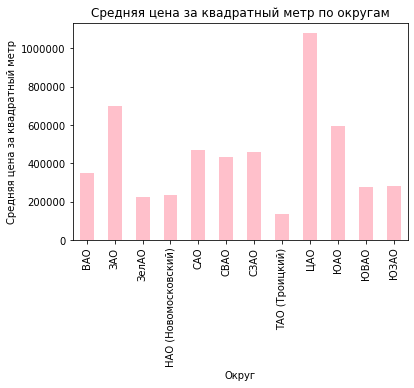

In [227]:
plt.ticklabel_format(style = 'plain')
your_df.groupby(by='district')['price_per_meter'].mean().plot(kind='bar', legend=None, color='pink');
plt.title('Средняя цена за квадратный метр по округам')
plt.xlabel('Округ')
plt.ylabel('Средняя цена за квадратный метр');

##### Можем заметить, что средние цены за квадратный метр в ЮВАО и ЮЗАО равны. Исходя из этого выдвинем гипотезу, что действительно стоимости квадратного метра жилья в ЮВАО и ЮЗАО равны и позже проверим наше предположение.

##### Выясним, как соотносятся между собой средние цены за квадратный метр в апартаментах и в квартирах

In [121]:
your_df.groupby('flat_or_appart')['price_per_meter'].mean()

flat_or_appart
A    818579.312064
F    793512.759321
Name: price_per_meter, dtype: float64

##### Здесь мы видим интересную закономерность, что цена за метр квадратный в апартаментах в среднем выше цены за метр квадратных в квартирах. Попробуем исследовать эту связь глубже

Посмотрим на список округов, которые у нас есть

In [217]:
X = your_df['district'].unique()
X = np.delete(X, 11)
X

array(['ЗАО', 'СЗАО', 'ЦАО', 'САО', 'ЮАО', 'СВАО', 'ВАО',
       'НАО (Новомосковский)', 'ЮВАО', 'ЮЗАО', 'ТАО (Троицкий)', 'ЗелАО'],
      dtype=object)

Всего у нас 12 округов

##### Визуализируем распределение количества квартир и апартаментов по округам

In [220]:
number_of_aps = np.array([])
for i in X:
    z = your_df[(your_df['flat_or_appart'] == 'A') & (your_df['district'] == f'{i}')]
    number_of_aps = np.append(number_of_aps, len(z))

In [221]:
number_of_flats = np.array([])
for i in X:
    z = your_df[(your_df['flat_or_appart'] == 'F') & (your_df['district'] == f'{i}')]
    number_of_flats = np.append(number_of_flats, len(z))

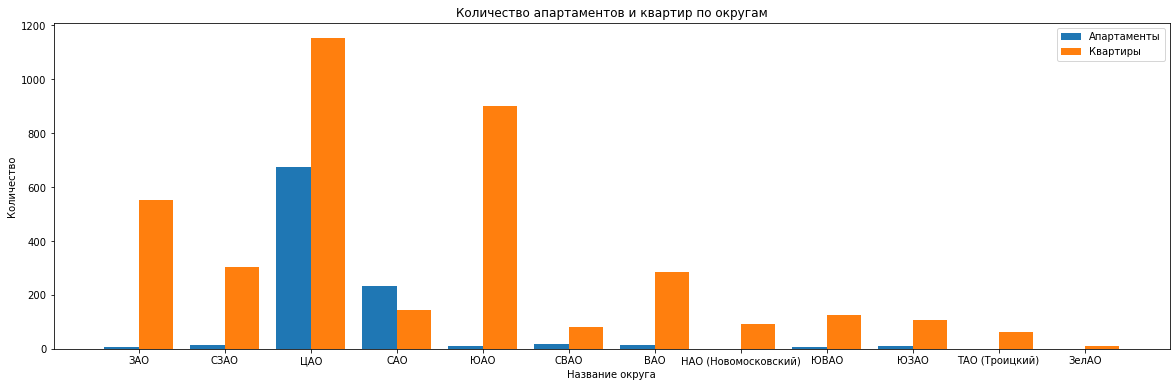

In [222]:
X_axis = np.arange(len(X))
plt.figure(figsize=(20,6))  
plt.bar(X_axis - 0.2, number_of_aps, 0.4, label = 'Апартаменты')
plt.bar(X_axis + 0.2, number_of_flats, 0.4, label = 'Квартиры')
  
plt.xticks(X_axis, X)
plt.xlabel("Название округа")
plt.ylabel("Количество")
plt.title("Количество апартаментов и квартир по округам")
plt.legend()
plt.show()

##### На графике видно, что больше всего апартаментов находятся в ЦАО, с этим может быть связана их высокая средняя цена. В отдаленных от центра Москвы районах апартаментов нет совсем.

##### Теперь исследуем средние цены квартир и апартаментов по округам

In [223]:
price_of_aps = np.array([])
for i in X:
    z = your_df[(your_df['flat_or_appart'] == 'A') & (your_df['district'] == f'{i}')]
    price_of_aps = np.append(price_of_aps, z['price_per_meter'].mean())

In [224]:
price_of_flats = np.array([])
for i in X:
    z = your_df[(your_df['flat_or_appart'] == 'F') & (your_df['district'] == f'{i}')]
    price_of_flats = np.append(price_of_flats, z['price_per_meter'].mean())

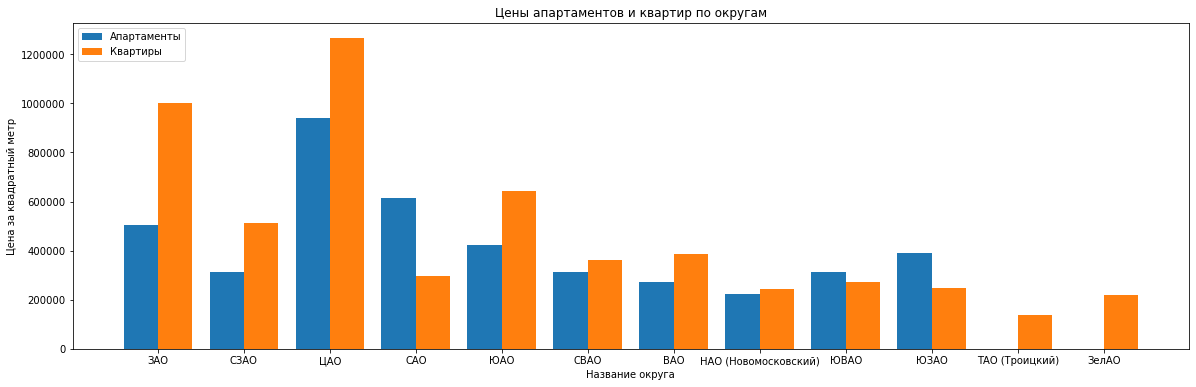

In [225]:
X_axis = np.arange(len(X))

plt.figure(figsize=(20,6)) 
plt.ticklabel_format(style = 'plain')
plt.bar(X_axis - 0.2, price_of_aps, 0.4, label = 'Апартаменты')
plt.bar(X_axis + 0.2, price_of_flats, 0.4, label = 'Квартиры')
  
plt.xticks(X_axis, X)
plt.xlabel("Название округа")
plt.ylabel("Цена за квадратный метр")
plt.title("Цены апартаментов и квартир по округам")
plt.legend()
plt.show()

##### На графике видно, что в большинстве округов, где есть и квартиры, и апартаменты, квартиры стоят дороже, однако в САО, ЮВАО и ЮЗАО - наоборот. А в среднем, как выяснидось ранее, квадратный метр в апартаментах стоит дороже чем в квартирах.

##### Исходя из собственного жизненного опыта мы предпологаем, что для недвижимости более низкого ценового сегмента параметр "время до метро пешком" значительно влияет на цену (чем ближе к метро жилье, тем дороже квартира). Также мы думаем, что эта закономерность ослабевает или пропадает для недвижимости более высокого ценового сегмента. Посмотрим, какие результаты получатся на нашей выборке.

##### Сначала возьмем недвижимость с более низким ценником из нашей выборки. Это будет жилье стоимостью ниже 30 миллионов рублей.

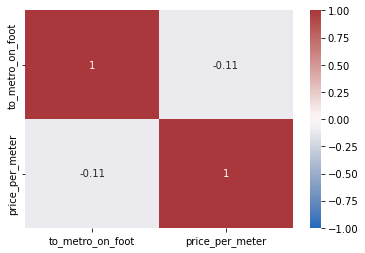

In [230]:
matrix = your_df[your_df['mainprice']<30000000][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, что есть небольшая обратная зависимость между временем до метро пешком и стоимостью квартиры.

##### Теперь посмотрим на "средний" ценовой сегмент для нашей выборки (по факту это очень приличное жилье, конечно). В нем будет недвижимость стоимостью от 30 до 60 миллионов рублей.

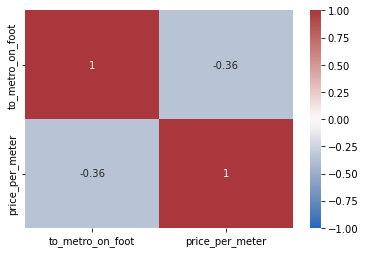

In [231]:
matrix = your_df[(your_df['mainprice']>30000000) & (your_df['mainprice']<60000000)][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, обратная зависимость времени до метро пешком и цены недвижимости усилилась больше чем втрое.

##### Наконец оценим эту зависимость для элитной недвижимости стоимостью более 60 миллионов рублей.

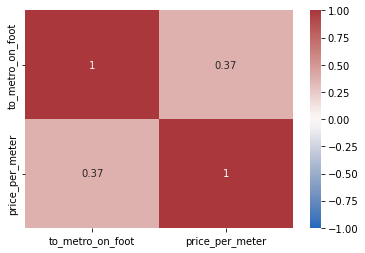

In [232]:
matrix = your_df[your_df['mainprice']>60000000][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, что для элитной недвижимости ситуацияя иная: чем дальше жилье от метро, тем больше его цена. Это интересные результаты и в следующих пунктах мы проверим гипотезу о том, что для более дешевого жилья между временем до метро и ценой существует отрицательная связь, а для элитной недвижимости - положительная.

##### У нас также появилась мысль о том, что квартиры на последнем и предпоследнем этажах в наших новостройках могут стоить дороже остальных. Это может быть справедливо, так как в таких квартирах обычно более высокие потолки, а это повышает цену жилья. Такого признака не было в исходной таблице, поэтому переходим к пункту....

## Создание новых признаков

#####  В пунтке "Предварительная обработка" мы уже создавали новые признаки - время до метро пешком и время до метро на транспорте.

##### Теперь мы хотим создать признак "Upper floors", который будет распределять квартиры на те, которые находятся на последних двух этажах здания и те, которые не находятся. Если квартира находится на последнем и предпоследнем этаже здания, в колонке проставить 1, в ином случае - 0.

In [236]:
your_df['upper_floors'] = np.zeros(8229)
for i in range(8229):
    if your_df['floors_total'][i] - your_df['floor'][i] <= 1:
        your_df['upper_floors'][i] = 1

C:\Users\79024\AppData\Local\Temp/ipykernel_24012/3920402108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  your_df['upper_floors'][i] = 1


In [239]:
your_df['upper_floors']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8224    0.0
8225    0.0
8226    0.0
8227    0.0
8228    0.0
Name: upper_floors, Length: 8229, dtype: float64

##### Посмотрим на средние цены недвижимости на последних этажах и на остальных этажах.

In [243]:
your_df[your_df['upper_floors']==1]['mainprice'].mean()

39868430.753665686

In [244]:
your_df[your_df['upper_floors']==0]['mainprice'].mean()

36235968.58189655

##### Мы видим, что цены недвижимости на последнем и предпоследнем этажах действительно больше, чем на остальных!

##### Исходя из наших предположений мы хотим проверить гипотезу о том, что недвижимость стоит дороже, если находится на последнем и предпоследнем этажах.